# Objective
This case study aims to equip with practical skills in data science, focusing on predicting customer
behaviors and booking cancellations in the hotel industry. I will be applying EDA, KNN, Decision Tree
algorithms, and learn to handle class imbalances using SMOTE.

#### About the Data
The dataset is of 'INN Hotels,' containing various features related to hotel bookings.
I will analyze this data to uncover insights and predict booking cancellations.


#### Tasks
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Predictive Modeling
4. Handling Class Imbalance with SMOTE

### Data Cleaning, Preprocessing and Exploration

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif # for the feature selection algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, accuracy_score,confusion_matrix


from sklearn.model_selection import GridSearchCV
sns.set(color_codes=True)


In [19]:
data = pd.read_csv("Hotel Reservations.csv")

In [20]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [21]:
data.describe

<bound method NDFrame.describe of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2   

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [23]:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

Dividing data into numerical and categorical columns

In [32]:
num = data.select_dtypes(include=['float64', 'int64']).columns
cat = data.select_dtypes(include='object').columns

In [33]:
len(num)

14

In [43]:
cat

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

## Exploratory Data Analysis(EDA)

In [27]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the the data. Now we will check whether data has duplicates, outliers and how do these anomolies impact our data and we can treat them

In [28]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

In [29]:
duplicate_rows= data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 19)


Checking for Outliers

We will first check the numerical columns

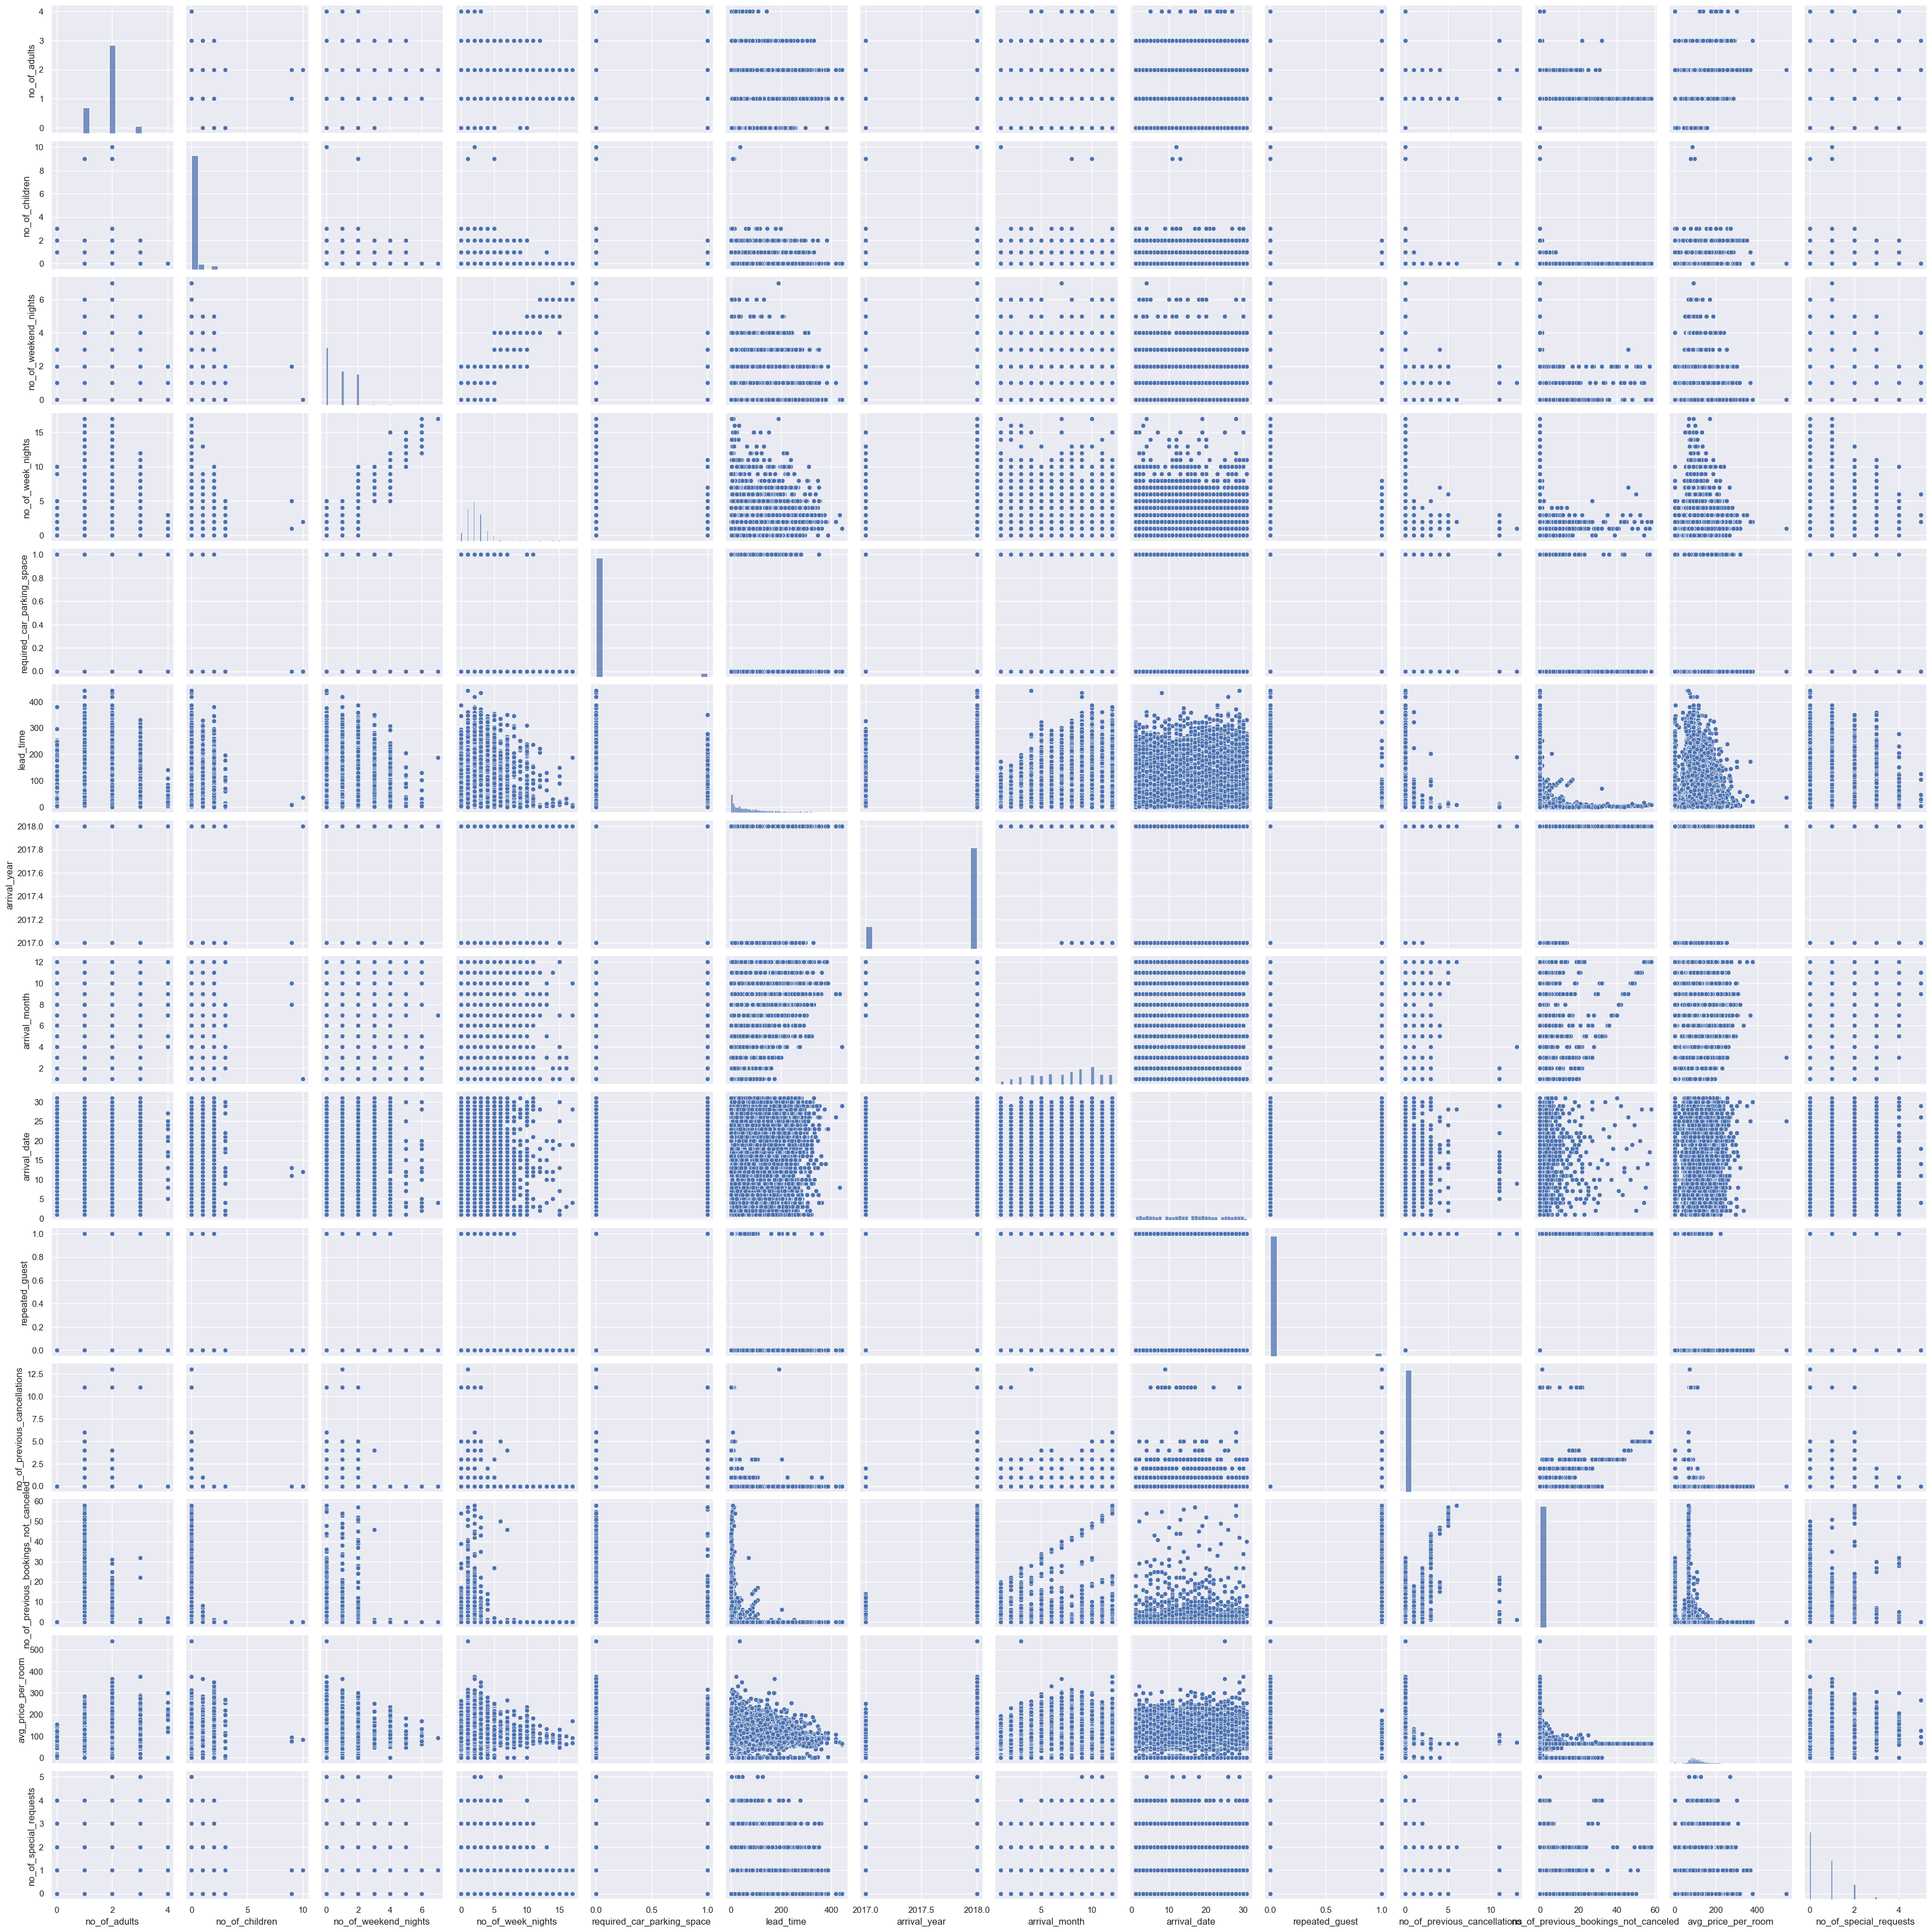

In [35]:
sns.pairplot(data[num])

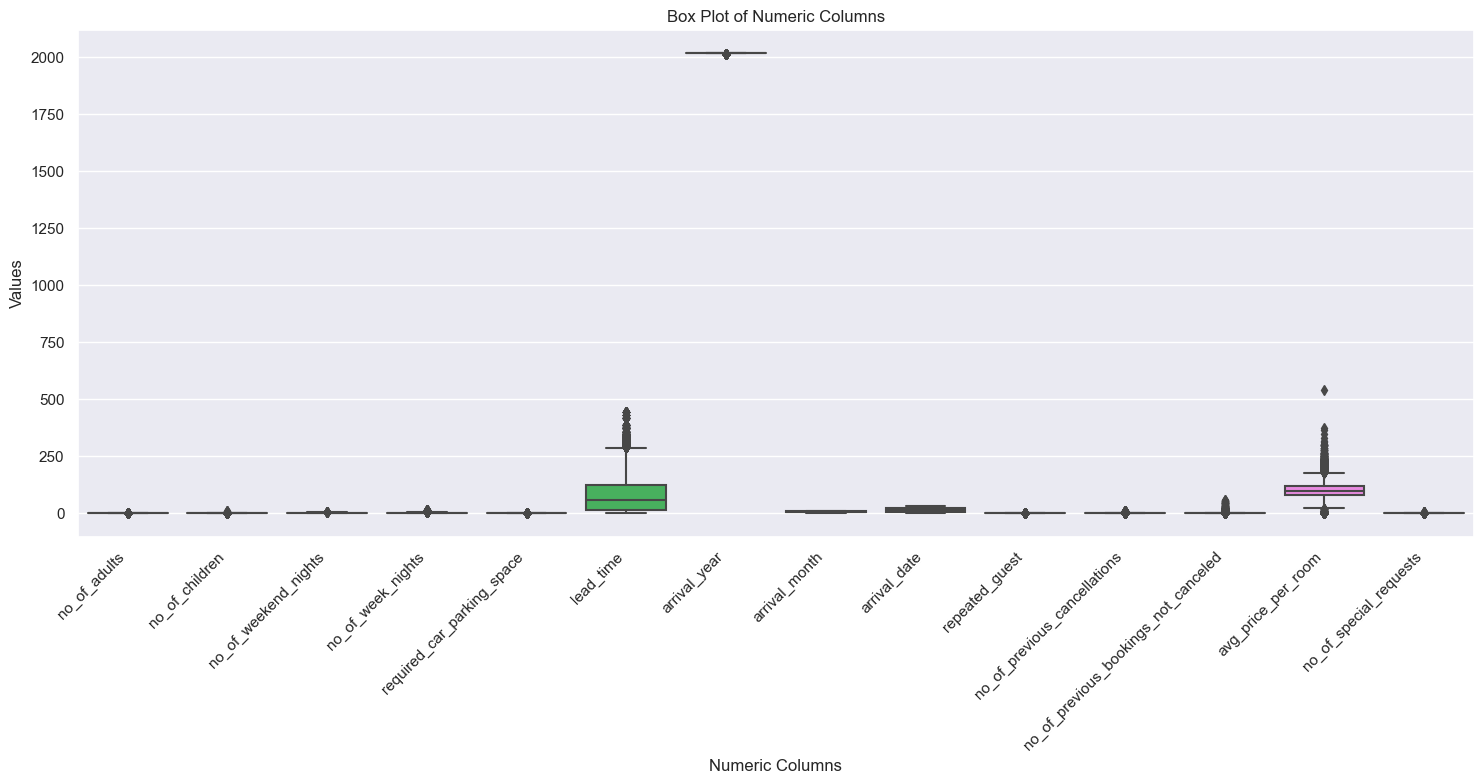

In [36]:
melted_data = pd.melt(data, value_vars=num)
# Create a combined box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', y='value', data=melted_data)
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Lead time and avg_price_per_room columns in numerical columns show outliers.

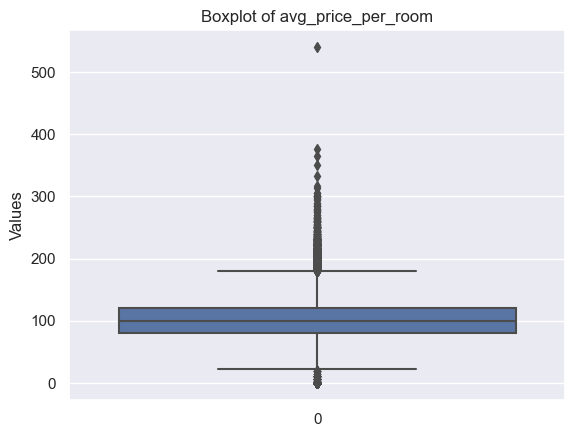

In [37]:
sns.boxplot(data['avg_price_per_room'])
plt.title('Boxplot of ' + 'avg_price_per_room')
plt.ylabel('Values')
plt.show()

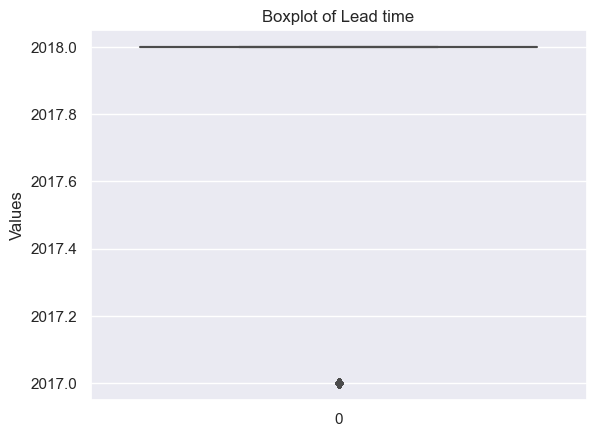

In [38]:
sns.boxplot(data['arrival_year'])
plt.title('Boxplot of ' + 'Lead time')
plt.ylabel('Values')
plt.show()

Upon plotting boxplots, not much outliers are present that could effect the overall learning of the machine algorithms. Therefore we will not drop the few outliers we have.

In [40]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### Multivariate Analysis

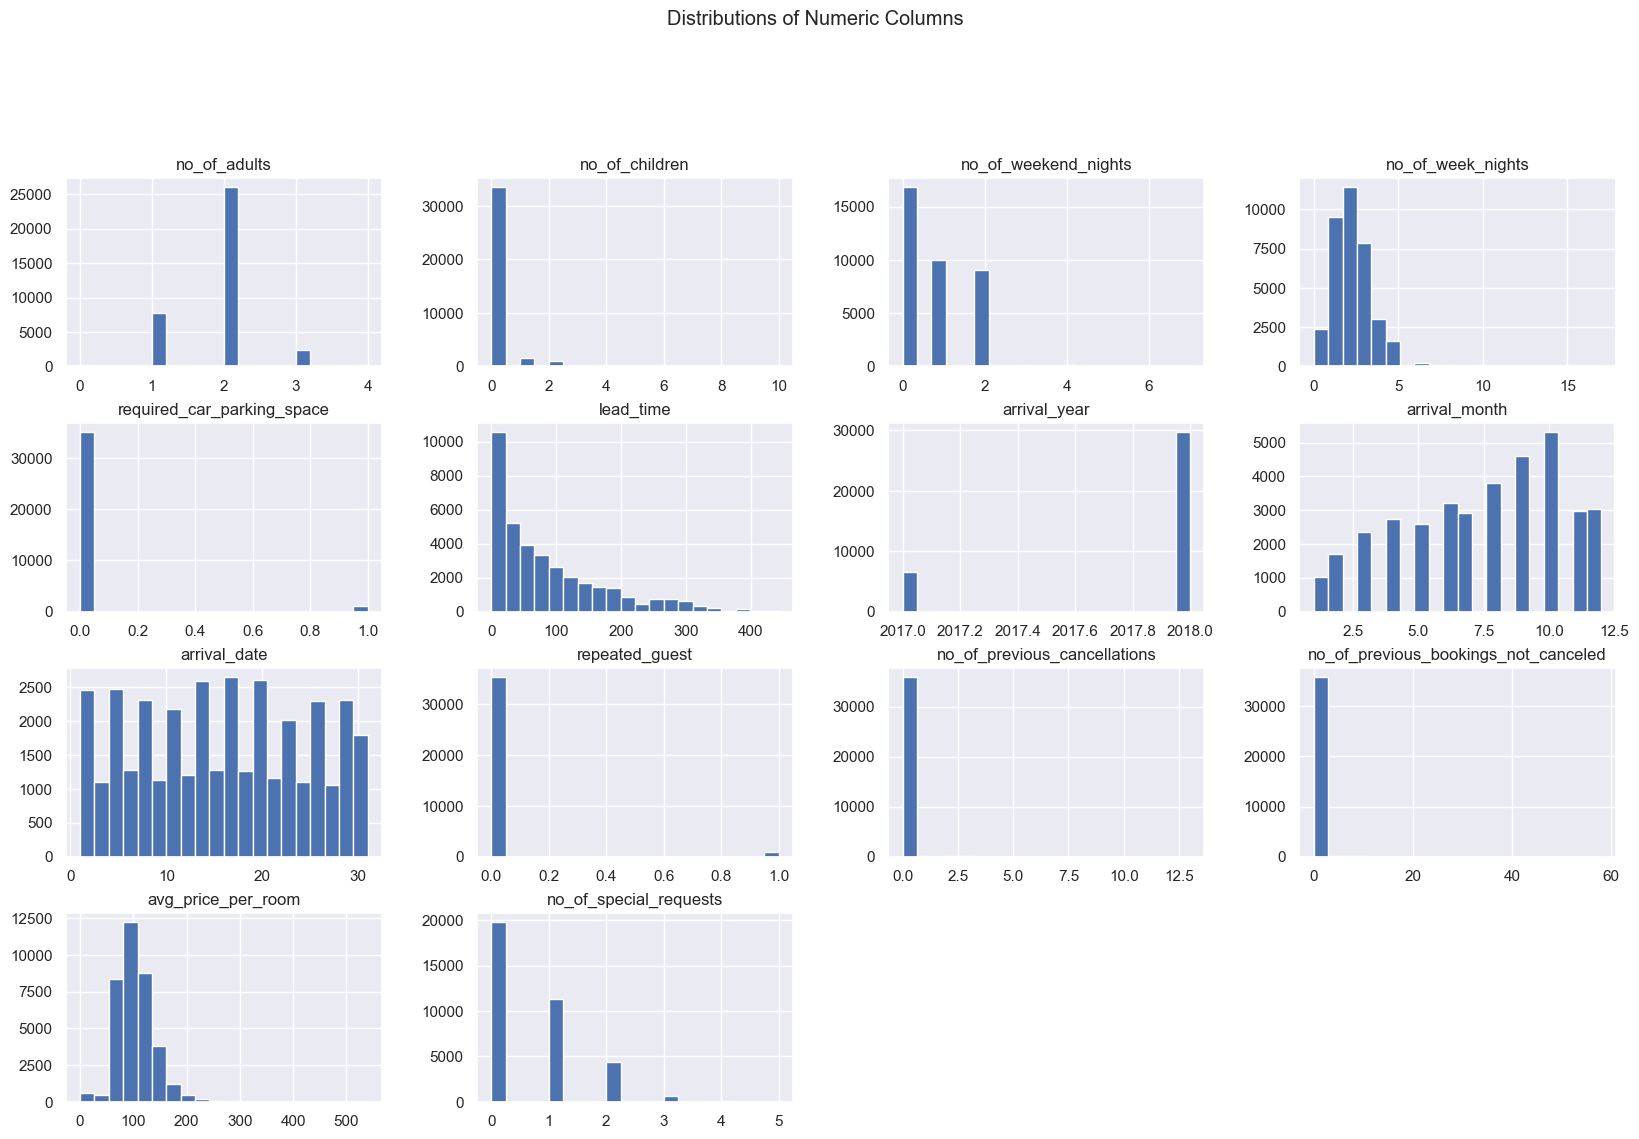

In [41]:
data[num].hist(bins=20, figsize=(20, 12))
plt.suptitle('Distributions of Numeric Columns', y=1.02)
plt.show()

#### Correlation Matrix

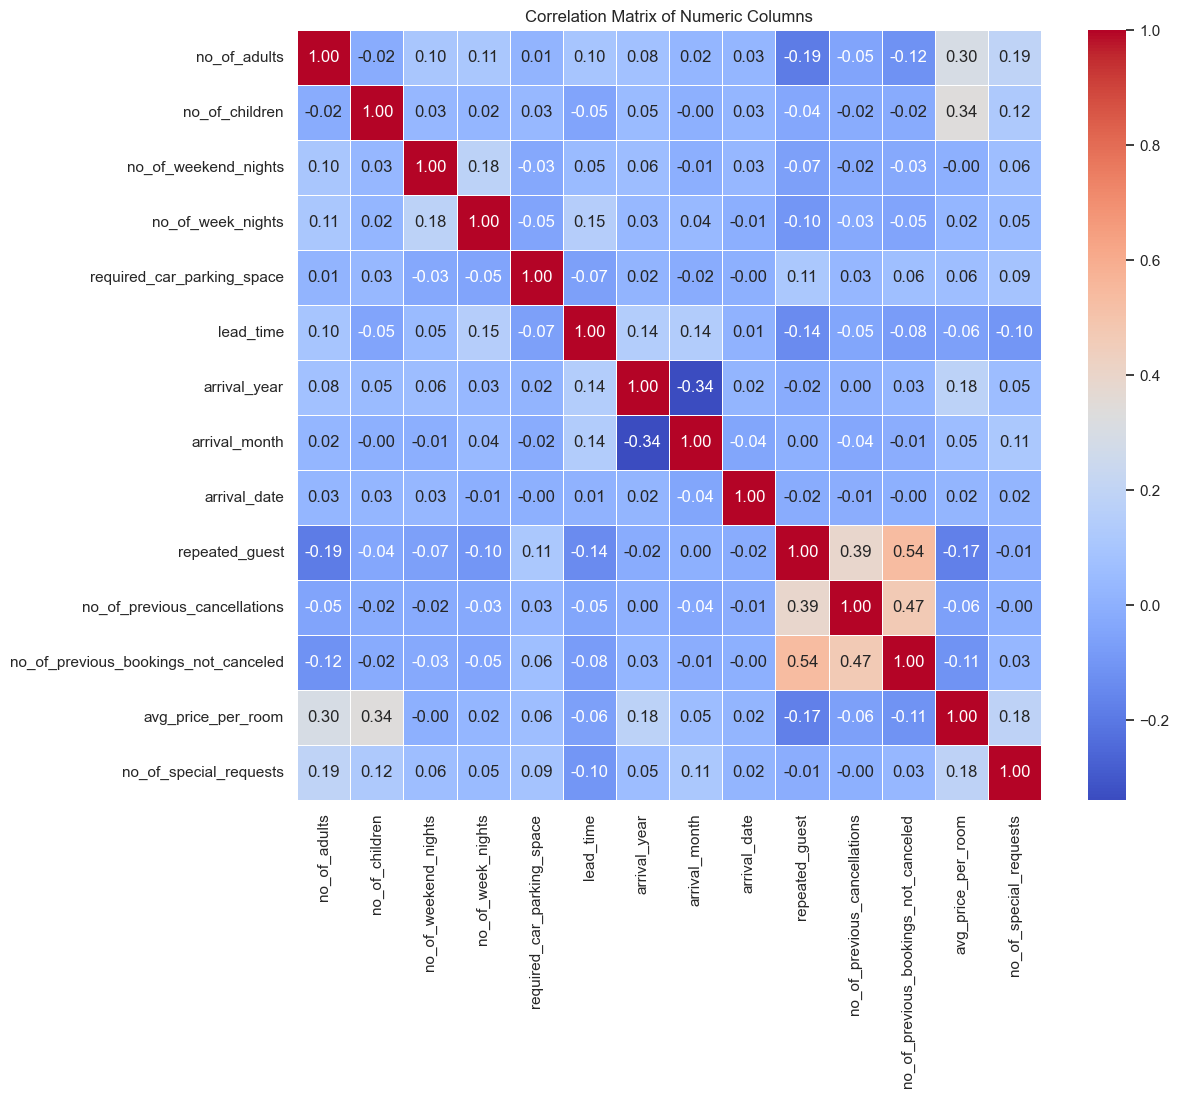

In [42]:
correlation_matrix = data[num].corr()

# Create a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

Converting categorical columns in to numeric to make them Machine readable

In [44]:
le = LabelEncoder()

data['type_of_meal_plan_encoded'] = le.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved_encoded'] = le.fit_transform(data['room_type_reserved'])
data['market_segment_type_encoded'] = le.fit_transform(data['market_segment_type'])
data['booking_status_encoded'] = le.fit_transform(data['booking_status'])



# Remove the original categorical columns from the encoded dataset
categorical_columns = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
data_encoded = data.drop(cat, axis=1)
data_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,booking_status_encoded
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,3,1
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,3,0,4,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0,4,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0,4,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,3,0,4,0


In [46]:
# save encoded dataset to a csv file
data_encoded.to_csv('hotel_booking_encoded.csv', index=False)

Check the out folder for hotel_booking_encoded.csv

In [47]:
data_encoded.head(4)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,booking_status_encoded
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,3,1
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,3,0,4,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0,4,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0,4,0


#### Applying correlation Matrix on the encoded data

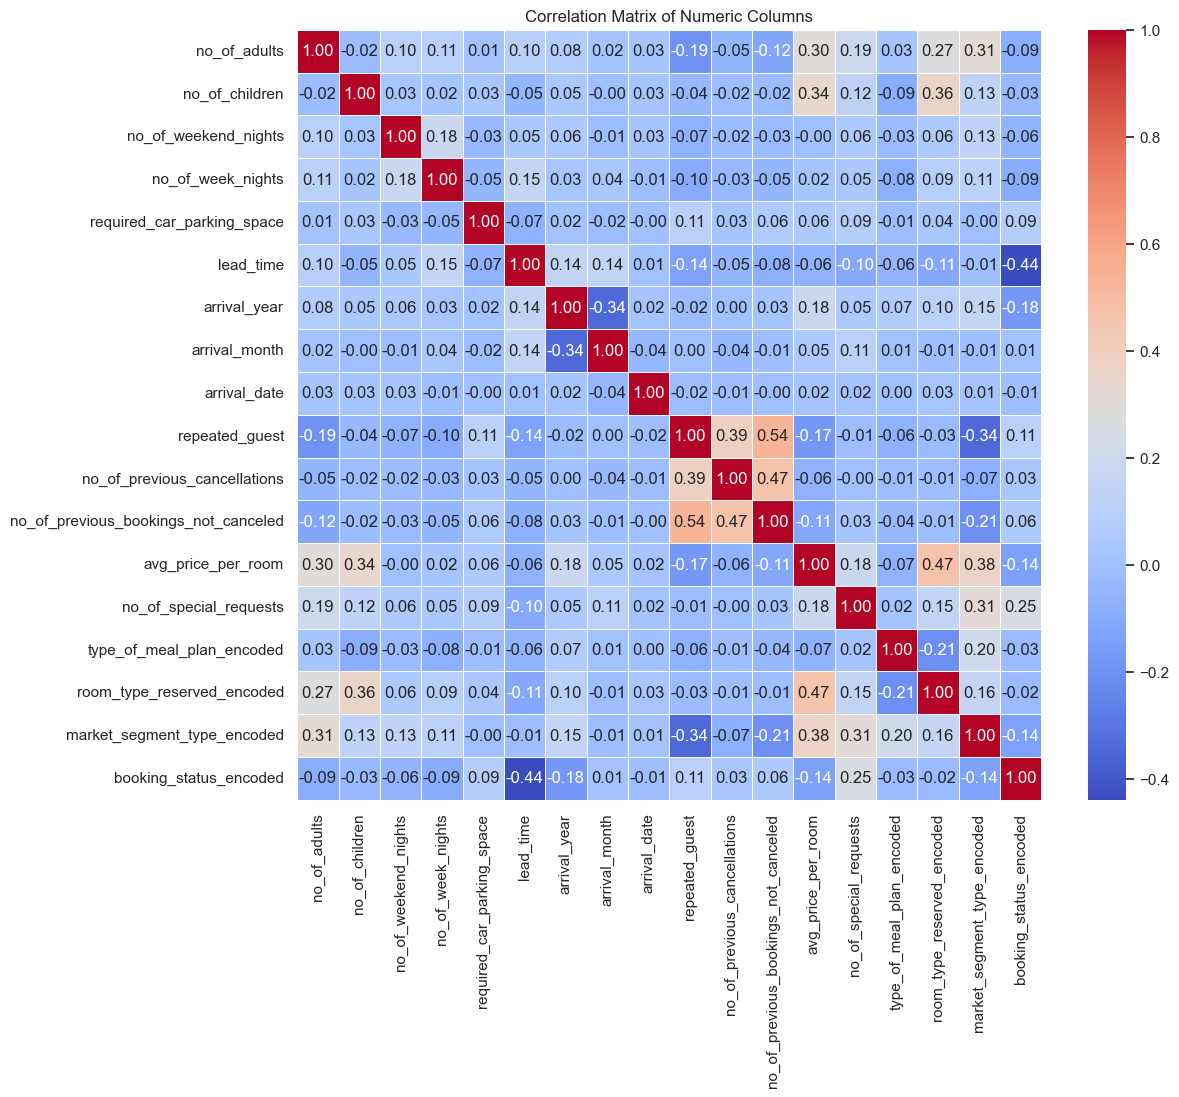

In [48]:
correlation_matrix = data_encoded.corr()

# Create a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [49]:
data_encoded.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_encoded', 'room_type_reserved_encoded',
       'market_segment_type_encoded', 'booking_status_encoded'],
      dtype='object')

### 3- Predictive Modeling KNN and Decision Tree

Splitting data

Split data into train and test set for evaluation

In [50]:
X = data_encoded.drop('booking_status_encoded', axis=1)  # Exclude the target variable
y = data_encoded['booking_status_encoded']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (29020, 17)
X_test shape: (7255, 17)
y_train shape: (29020,)
y_test shape: (7255,)


In [52]:
# with ANOVA F-statistic for feature selection
X_selected = SelectKBest(f_classif, k=10).fit_transform(X, y) 
X_selected

array([[  2.  ,   1.  ,   2.  , ...,  65.  ,   0.  ,   3.  ],
       [  2.  ,   2.  ,   3.  , ..., 106.68,   1.  ,   4.  ],
       [  1.  ,   2.  ,   1.  , ...,  60.  ,   0.  ,   4.  ],
       ...,
       [  2.  ,   2.  ,   6.  , ...,  98.39,   2.  ,   4.  ],
       [  2.  ,   0.  ,   3.  , ...,  94.5 ,   0.  ,   4.  ],
       [  2.  ,   1.  ,   2.  , ..., 161.67,   0.  ,   3.  ]])

### KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8082701585113715


Applying Standard scaler to normalize the data

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8013783597518952


After applying the standard scaler the accuracy improved from .80 to .81

In [59]:
X = data_encoded.drop('booking_status_encoded', axis=1)  # Exclude the target variable
y = data_encoded['booking_status_encoded']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(9, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(9, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print('________________________________________________________________________________________________________________________________')
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)


Euclidean Accuracy: 0.8447966919365955
Euclidean Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      2416
           1       0.87      0.90      0.89      4839

    accuracy                           0.84      7255
   macro avg       0.83      0.82      0.82      7255
weighted avg       0.84      0.84      0.84      7255

________________________________________________________________________________________________________________________________
Manhattan Accuracy: 0.8544452101998622
Manhattan Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      2416
           1       0.88      0.91      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.84      0.83      0.83      7255
weighted avg       0.85      0.85      0.85      7255



### Model Fine Tuning

In [60]:
from sklearn.metrics import make_scorer

param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
# Create KNN model
knn_model = KNeighborsClassifier()

# Define evaluation metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
 

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5}


Manhattan seems to be a better metric for distance and K val is 5

### Decision Tree 

In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your dataset loaded into X (features) and y (target variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8727773949000689
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      2416
           1       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



###  Handling Class Imbalance with SMOTE

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming you have your dataset loaded into X (features) and y (target variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a KNN model
knn_model = KNeighborsClassifier()

# Train the model on the resampled data
knn_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("KNN with SMOTE:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

KNN with SMOTE:
Accuracy: 0.7835975189524466
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      2416
           1       0.87      0.80      0.83      4839

    accuracy                           0.78      7255
   macro avg       0.76      0.78      0.77      7255
weighted avg       0.80      0.78      0.79      7255



In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Assuming X_resampled and y_resampled from the previous SMOTE step

# Define the pipeline with SMOTE and KNN
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid for KNN
param_grid = {
    'knn__n_neighbors': [8,9,10,12],
    'knn__metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters on the resampled data
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best KNN Model with SMOTE:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Best KNN Model with SMOTE:
Best Hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9}
Accuracy: 0.7943487250172295
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71      2416
           1       0.88      0.80      0.84      4839

    accuracy                           0.79      7255
   macro avg       0.77      0.79      0.78      7255
weighted avg       0.81      0.79      0.80      7255



### Final Accuracy Report

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assuming X_resampled and y_resampled from the SMOTE step

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model with multiple metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Get feature importances
feature_importances = dt_model.feature_importances_

print("Decision Tree Model:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Feature Importances:\n", feature_importances)

Decision Tree Model:
Accuracy: 0.8687801516195727
Precision: 0.9135986380080868
Recall: 0.8871667699938004
F1-Score: 0.9001887188089748
Confusion Matrix:
 [[2010  406]
 [ 546 4293]]
Feature Importances:
 [0.02279381 0.00314828 0.03075853 0.0457064  0.00777014 0.33513269
 0.01514487 0.07217239 0.0706307  0.00107447 0.         0.00037324
 0.14126886 0.12454762 0.01351107 0.01280704 0.10315988]
